In [ ]:
'''
Data analysis for the beer dataset
'''

In [52]:
# import libraries

# numerical analytics
import pandas as pd
import numpy as np

#visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# text preprocessing
import datetime
import re, string
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer

# machine learning 
from sklearn.model_selection import train_test_split

In [3]:
# read data
data = pd.read_csv('beer_data_set.csv')

# Data Information

In [4]:
# inspect data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5558 entries, 0 to 5557
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         5556 non-null   object 
 1   key          5558 non-null   int64  
 2   Style        5558 non-null   object 
 3   Style Key    5558 non-null   int64  
 4   Brewery      5558 non-null   object 
 5   Description  5558 non-null   object 
 6   ABV          5558 non-null   float64
 7   Ave Rating   5558 non-null   float64
 8   Min IBU      5558 non-null   int64  
 9   Max IBU      5558 non-null   int64  
 10  Astringency  5558 non-null   int64  
 11  Body         5558 non-null   int64  
 12  Alcohol      5558 non-null   int64  
 13  Bitter       5558 non-null   int64  
 14  Sweet        5558 non-null   int64  
 15  Sour         5558 non-null   int64  
 16  Salty        5558 non-null   int64  
 17  Fruits       5558 non-null   int64  
 18  Hoppy        5558 non-null   int64  
 19  Spices

In [7]:
print(data.shape)
data.head()

(5558, 21)


,Name,key,Style,Style Key,Brewery,Description,ABV,Ave Rating,Min IBU,Max IBU,...,Body,Alcohol,Bitter,Sweet,Sour,Salty,Fruits,Hoppy,Spices,Malty
0,Amber,251,Altbier,8,Alaskan Brewing Co.,"Notes:Richly malty and long on the palate, wit...",5.3,3.65,25,50,...,32,9,47,74,33,0,33,57,8,111
1,Double Bag,252,Altbier,8,Long Trail Brewing Co.,"Notes:This malty, full-bodied double alt is al...",7.2,3.90,25,50,...,57,18,33,55,16,0,24,35,12,84
2,Long Trail Ale,253,Altbier,8,Long Trail Brewing Co.,Notes:Long Trail Ale is a full-bodied amber al...,5.0,3.58,25,50,...,37,6,42,43,11,0,10,54,4,62
3,Doppelsticke,254,Altbier,8,Uerige Obergärige Hausbrauerei,Notes:,8.5,4.15,25,50,...,55,31,47,101,18,1,49,40,16,119
4,Scurry,255,Altbier,8,Off Color Brewing,Notes:Just cause it's dark and German doesn't ...,5.3,3.67,25,50,...,69,10,63,120,14,0,19,36,15,218


<AxesSubplot:>

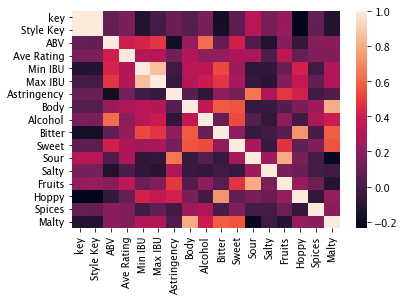

In [23]:
# inspect variables coreleration
sns.heatmap(data.corr())

array([[<AxesSubplot:title={'center':'key'}>,
        <AxesSubplot:title={'center':'Style Key'}>,
        <AxesSubplot:title={'center':'ABV'}>,
        <AxesSubplot:title={'center':'Ave Rating'}>],
       [<AxesSubplot:title={'center':'Min IBU'}>,
        <AxesSubplot:title={'center':'Max IBU'}>,
        <AxesSubplot:title={'center':'Astringency'}>,
        <AxesSubplot:title={'center':'Body'}>],
       [<AxesSubplot:title={'center':'Alcohol'}>,
        <AxesSubplot:title={'center':'Bitter'}>,
        <AxesSubplot:title={'center':'Sweet'}>,
        <AxesSubplot:title={'center':'Sour'}>],
       [<AxesSubplot:title={'center':'Salty'}>,
        <AxesSubplot:title={'center':'Fruits'}>,
        <AxesSubplot:title={'center':'Hoppy'}>,
        <AxesSubplot:title={'center':'Spices'}>],
       [<AxesSubplot:title={'center':'Malty'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

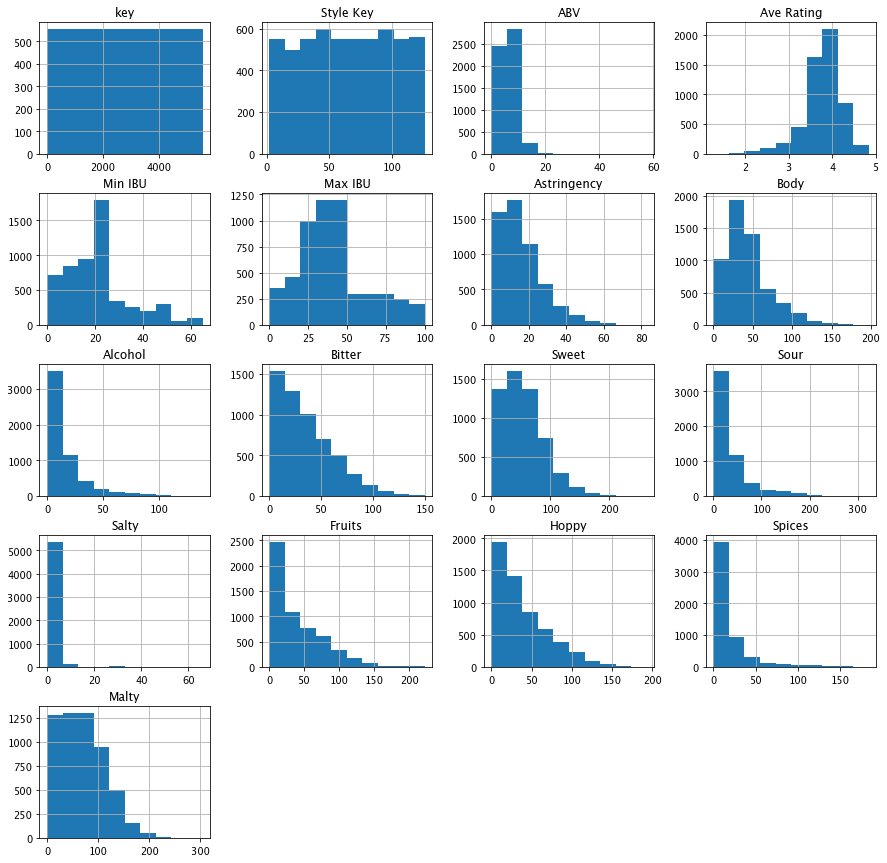

In [24]:
# inspect the distribution of the data
data.hist(figsize=(15,15))

In [13]:
# inspect unique values
print(data.nunique())

Name           5317
key            5558
Style           112
Style Key       112
Brewery        1498
Description    3347
ABV             229
Ave Rating      289
Min IBU          21
Max IBU          25
Astringency      73
Body            165
Alcohol         116
Bitter          141
Sweet           191
Sour            222
Salty            47
Fruits          185
Hoppy           156
Spices          155
Malty           217
dtype: int64


In [14]:
# inspect na values
print(data.isna().any())

Name            True
key            False
Style          False
Style Key      False
Brewery        False
Description    False
ABV            False
Ave Rating     False
Min IBU        False
Max IBU        False
Astringency    False
Body           False
Alcohol        False
Bitter         False
Sweet          False
Sour           False
Salty          False
Fruits         False
Hoppy          False
Spices         False
Malty          False
dtype: bool


In [21]:
# inspect Brewery column
print(data['Brewery'].nunique()) #total number of brewers
data['Brewery'].unique() #name of the brewers

1498


array(['Alaskan Brewing Co.', 'Long Trail Brewing Co.',
       'Uerige Obergärige Hausbrauerei', ..., 'Russell Brewing Company',
       'Aslin Beer Company', 'Stony Creek Brewery'], dtype=object)

In [70]:
# there are some rows that contain 'error entering this description' in their description
data.loc[data['Description'] == 'error entering this description', :]

,Name,key,Style,Style Key,Brewery,Description,ABV,Ave Rating,Min IBU,Max IBU,...,Body,Alcohol,Bitter,Sweet,Sour,Salty,Fruits,Hoppy,Spices,Malty
3166,Alpha King,2004,Pale Ale - American,48,3 Floyds Brewing Co.,error entering this description,6.66,4.26,25,50,...,25,6,45,37,41,1,46,78,6,55
5551,Winter Ale,694,Winter Warmer,17,Fremont Brewing Company,error entering this description,8.00,3.87,35,50,...,80,26,56,79,19,0,27,44,26,122


# Data pre-processing

In [73]:
# drop useless columns: Name, Style, 
df_beer = data.drop(['Name', 'Style'], axis = 1)
df_beer.head(10)

,key,Style Key,Brewery,Description,ABV,Ave Rating,Min IBU,Max IBU,Astringency,Body,Alcohol,Bitter,Sweet,Sour,Salty,Fruits,Hoppy,Spices,Malty
0,251,8,Alaskan Brewing Co.,"Notes:Richly malty and long on the palate, wit...",5.3,3.65,25,50,13,32,9,47,74,33,0,33,57,8,111
1,252,8,Long Trail Brewing Co.,"Notes:This malty, full-bodied double alt is al...",7.2,3.90,25,50,12,57,18,33,55,16,0,24,35,12,84
2,253,8,Long Trail Brewing Co.,Notes:Long Trail Ale is a full-bodied amber al...,5.0,3.58,25,50,14,37,6,42,43,11,0,10,54,4,62
3,254,8,Uerige Obergärige Hausbrauerei,Notes:,8.5,4.15,25,50,13,55,31,47,101,18,1,49,40,16,119
4,255,8,Off Color Brewing,Notes:Just cause it's dark and German doesn't ...,5.3,3.67,25,50,21,69,10,63,120,14,0,19,36,15,218
5,256,8,Ninkasi Brewing Company,Notes:Called 'Dark Double Alt' on the label.Se...,7.2,3.78,25,50,25,51,26,44,45,9,1,11,51,20,95
6,257,8,Uerige Obergärige Hausbrauerei,Notes:,6.0,4.10,25,50,22,45,13,46,62,25,1,34,60,4,103
7,258,8,Widmer Brothers Brewing Company,Notes:Classified as a German Altbier by the Wi...,5.3,3.46,25,50,28,40,3,40,58,29,0,36,54,8,97
8,259,8,Southampton Publick House,Notes:,5.0,3.60,25,50,18,49,5,37,73,22,0,21,37,4,98
9,260,8,The Olde Mecklenburg Brewery,"Notes:OMB’s flagship, Copper, is an authentic ...",4.8,4.10,25,50,25,35,4,38,39,13,1,8,60,16,97


In [75]:
# remove rows that contain only 'Notes:' in description - they are NA values

# 1. remove the 'Notes' in the description - so that rows that contain only 'Notes:' in description will become empty
df_beer['Description'] = df_beer['Description'].str.replace(r'Notes:', "", regex = True)
print(df_beer.shape)

# 2. create a new dataframe with rows that contain description with length greater than 0 (rows that have no empty description)
df_beer1 = df_beer[df_beer['Description'].str.split().str.len().gt(0)]
print(df_beer1.shape)

# When inspecting the dataset, there are some rows that contain description of 'error entering this description', these rows need to be removed as well
df_beer1.drop(df_beer1[df_beer1['Description'] == 'error entering this description'].index, axis=0, inplace = True)

#check the shape of the new df if we have removed the empty description rows
print(df_beer1.shape)
df_beer1.head(10)

(5558, 19)
(3362, 19)
(3360, 19)


/var/folders/ll/ncm33t_54x7bk5x9z5frczz40000gn/T/ipykernel_80373/3773452109.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_beer1.drop(df_beer1[df_beer1['Description'] == 'error entering this description'].index, axis=0, inplace = True)


,key,Style Key,Brewery,Description,ABV,Ave Rating,Min IBU,Max IBU,Astringency,Body,Alcohol,Bitter,Sweet,Sour,Salty,Fruits,Hoppy,Spices,Malty
0,251,8,Alaskan Brewing Co.,"Richly malty and long on the palate, with just...",5.3,3.65,25,50,13,32,9,47,74,33,0,33,57,8,111
1,252,8,Long Trail Brewing Co.,"This malty, full-bodied double alt is also kno...",7.2,3.90,25,50,12,57,18,33,55,16,0,24,35,12,84
2,253,8,Long Trail Brewing Co.,Long Trail Ale is a full-bodied amber ale mode...,5.0,3.58,25,50,14,37,6,42,43,11,0,10,54,4,62
4,255,8,Off Color Brewing,Just cause it's dark and German doesn't mean i...,5.3,3.67,25,50,21,69,10,63,120,14,0,19,36,15,218
5,256,8,Ninkasi Brewing Company,Called 'Dark Double Alt' on the label.Seize th...,7.2,3.78,25,50,25,51,26,44,45,9,1,11,51,20,95
7,258,8,Widmer Brothers Brewing Company,Classified as a German Altbier by the Widmer B...,5.3,3.46,25,50,28,40,3,40,58,29,0,36,54,8,97
9,260,8,The Olde Mecklenburg Brewery,"OMB’s flagship, Copper, is an authentic Düssel...",4.8,4.10,25,50,25,35,4,38,39,13,1,8,60,16,97
11,262,8,Uerige Obergärige Hausbrauerei,Uerige Alt is the most bittered beer in German...,4.7,4.00,25,50,34,48,9,55,59,25,1,32,68,12,121
12,263,8,Yazoo Brewing Company,Check out a piece of Nashville brewing history...,5.1,3.54,25,50,10,19,1,21,30,11,4,8,24,2,65
13,264,8,Free State Brewing Co.,This ale is the first brewed in Kansas since p...,5.6,3.69,25,50,7,30,5,43,43,13,1,13,50,6,93


In [50]:
# define a function for text cleaning 
def preprocess(text):

    # Remove special characters 
    text = re.sub(r'\W', ' ', text)

    # remove all single characters
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text) # remove space 
    text = re.sub(r'\^[a-zA-Z]\s+', ' ', text) 

    # remove all numbers
    text = re.sub(r'\d+','', text) 

    # remove \t
    text = re.sub(r'\t','', text) 

    # substitute multiple white spaces with single space
    text = re.sub(r'\s+', ' ', text, flags=re.I)

    # Remove prefixed 'b'
    text = re.sub(r'^b\s+', '', text)

    # Remove punctations 
    text = re.compile('[%s]' % re.escape(string.punctuation)).sub('', text)

    return text

In [66]:
#apply text preprocess function
df_beer1['Description'] = df_beer1['Description'].apply(lambda x: preprocess(x))
df_beer1

/var/folders/ll/ncm33t_54x7bk5x9z5frczz40000gn/T/ipykernel_80373/1623173113.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_beer1['Description'] = df_beer1['Description'].apply(lambda x: preprocess(x))


,key,Style Key,Brewery,Description,ABV,Ave Rating,Min IBU,Max IBU,Astringency,Body,Alcohol,Bitter,Sweet,Sour,Salty,Fruits,Hoppy,Spices,Malty
0,251,8,Alaskan Brewing Co.,Richly malty and long on the palate with just ...,5.3,3.65,25,50,13,32,9,47,74,33,0,33,57,8,111
1,252,8,Long Trail Brewing Co.,This malty full bodied double alt is also know...,7.2,3.90,25,50,12,57,18,33,55,16,0,24,35,12,84
2,253,8,Long Trail Brewing Co.,Long Trail Ale is full bodied amber ale modele...,5.0,3.58,25,50,14,37,6,42,43,11,0,10,54,4,62
4,255,8,Off Color Brewing,Just cause it dark and German doesn mean it an...,5.3,3.67,25,50,21,69,10,63,120,14,0,19,36,15,218
5,256,8,Ninkasi Brewing Company,Called Dark Double Alt on the label Seize the ...,7.2,3.78,25,50,25,51,26,44,45,9,1,11,51,20,95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5551,694,17,Fremont Brewing Company,error entering this description,8.0,3.87,35,50,10,80,26,56,79,19,0,27,44,26,122
5552,695,17,RJ Rockers Brewing Company,This hearty American pale ale contains rich bl...,6.0,3.63,35,50,15,31,23,16,54,43,0,54,14,140,58
5554,697,17,Anchor Brewing Company,This is the forty fifth annual Our Special Ale...,6.9,3.79,35,50,22,73,9,58,87,23,0,48,91,44,104
5556,699,17,Shmaltz Brewing Company,Chanukah Beer pours rich crystal clear chestnu...,8.0,3.61,35,50,6,64,30,57,78,15,1,28,57,23,129


In [59]:
df_beer1['Description'].tolist()

['Richly malty and long on the palate with just enough hop backing to make this beautiful amber colored alt style beer notably well balanced ',
 'This malty full bodied double alt is also known as Stickebier German slang for secret brew Long Trail Double Bag was originally offered only in our brewery taproom as special treat to our visitors With an alcohol content of please indulge in moderation The Long Trail Brewing Company is proud to have Double Bag named Malt Advocate Beer of the Year in Malt Advocate is national magazine devoted to expanding the boundaries of fine drinks Their panel of judges likes to keep things simple and therefore of thousands of eligible competitors they award only two categories Imported and Domestic It is great honor to receive this recognition IBU ',
 'Long Trail Ale is full bodied amber ale modeled after the Alt biers of Düsseldorf Germany Our top fermenting yeast and cold finishing temperature result in complex yet clean full flavor Originally introduced